https://notebook.community/harishkrao/DSE200x/Mini%20Project/Analysis%20on%20the%20Movie%20Lens%20dataset

https://ksknw.hatenablog.com/entry/2017/03/05/222437

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path = 'downloads/'

In [3]:
movies = pd.read_csv(path + 'movies.csv')
movies.shape

(27278, 3)

In [4]:
tags = pd.read_csv(path + 'tags.csv')
tags.shape

(465564, 4)

In [5]:
ratings = pd.read_csv(path + 'ratings.csv')
ratings.shape

(20000263, 4)

In [6]:
links = pd.read_csv(path + 'links.csv')
links.shape

(27278, 3)

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [10]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [19]:
sub_ratings = ratings.head(100000)

X = np.zeros((sub_ratings["userId"].max(), sub_ratings["movieId"].max()))

for i,item in sub_ratings.iterrows():
    X[int(item["userId"]-1), int(item["movieId"]-1)] = item["rating"]

/var/folders/mm/snkk1gxj70jbnqk31tjtz3040000gn/T/ipykernel_92433/2559924745.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  cmap.set_bad('white',1.)


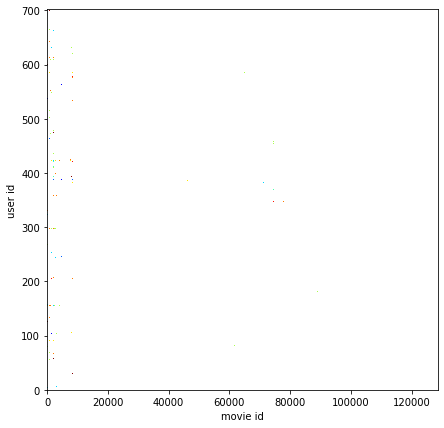

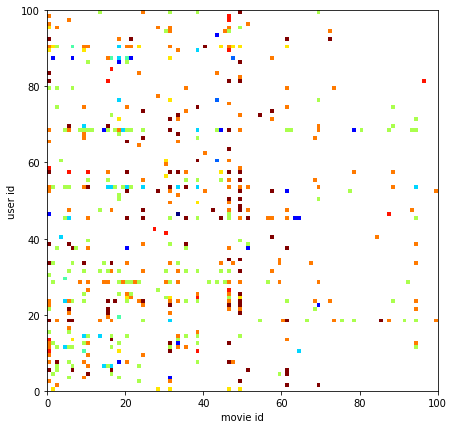

In [20]:
f, ax = plt.subplots(figsize=(7, 7))

import numpy.ma as ma
masked = ma.masked_where((X==0),X)
cmap = plt.cm.jet
cmap.set_bad('white',1.)
plt.pcolormesh(masked, cmap=cmap)
plt.xlabel("movie id")
plt.ylabel("user id")
plt.show()

f, ax = plt.subplots(figsize=(7, 7))

plt.pcolormesh(masked[:100, :100], cmap=cmap)
plt.xlabel("movie id")
plt.ylabel("user id")
plt.show()